In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'Stratum': ['A'] * 500 + ['B'] * 500,  # Two strata with 500 samples each
    'Feature': np.random.randn(1000)  # Random feature values
})

data




,Stratum,Feature
0,A,0.496714
1,A,-0.138264
2,A,0.647689
3,A,1.523030
4,A,-0.234153
...,...,...
995,B,-0.281100
996,B,1.797687
997,B,0.640843
998,B,-0.571179


In [4]:

# Compute distribution of strata in original dataset
original_distribution = data['Stratum'].value_counts(normalize=True)

original_distribution

Stratum
A    0.5
B    0.5
Name: proportion, dtype: float64

In [5]:
sampled_data = data.groupby('Stratum', group_keys=False).apply(lambda x: x.sample(frac=0.2))

sampled_data

/var/folders/jy/rw5jlch96_36tzx818rnglbw0000gn/T/ipykernel_64299/214222716.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('Stratum', group_keys=False).apply(lambda x: x.sample(frac=0.2))


,Stratum,Feature
350,A,0.310908
388,A,0.950424
243,A,0.865755
15,A,-0.562288
268,A,-0.440044
...,...,...
943,B,-0.099176
711,B,-0.096713
508,B,0.048522
749,B,-1.406661


In [6]:
sampled_distribution = sampled_data['Stratum'].value_counts(normalize=True)
sampled_distribution

Stratum
A    0.5
B    0.5
Name: proportion, dtype: float64

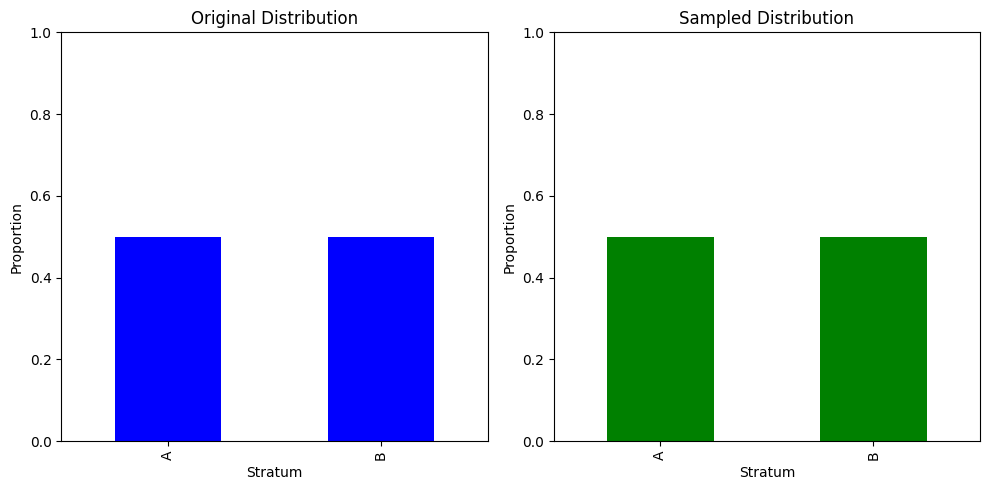

In [7]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original distribution
original_distribution.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Original Distribution')
axs[0].set_xlabel('Stratum')
axs[0].set_ylabel('Proportion')
axs[0].set_ylim([0, 1])

# Plot sampled distribution
sampled_distribution.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Sampled Distribution')
axs[1].set_xlabel('Stratum')
axs[1].set_ylabel('Proportion')
axs[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()